<a href="https://colab.research.google.com/github/esfandiaryfard/machine-learning/blob/main/HomeWork1_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from google.colab import drive
import numpy as np
import random
drive = drive.mount('/content/drive')
!unzip drive/MyDrive/Medical.zip -d Medical

In [2]:
dataset = torchvision.datasets.ImageFolder('Medical/')
num_train = len(dataset)
train_idx = list(range(num_train))

random.seed(1)
random.shuffle(train_idx)

test_frac =0.1

num_test = int(num_train * test_frac) 
num_train = num_train - num_test

test_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]


print(f"{num_train} samples used as train set")
print(f"{num_test}  samples used as test set")

53059 samples used as train set
5895  samples used as test set


In [3]:
random.seed(1)
random.shuffle(train_idx)

val_frac =0.1

num_val = int(num_train * val_frac) 
num_train = num_train - num_val

val_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]


print(f"{num_train} samples used as train set")
print(f"{num_val}  samples used as test set")

47754 samples used as train set
5305  samples used as test set


In [18]:
from torchvision.transforms.transforms import Normalize
from torchvision import transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader

data_transform = transforms.Compose([
  transforms.Resize(32),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

dataset = torchvision.datasets.ImageFolder('Medical/', transform=data_transform)

test_set = Subset(dataset, test_idx)
val_set = Subset(dataset, val_idx)
train_set = Subset(dataset, train_idx)

train_loader = DataLoader(
    train_set, batch_size=64, num_workers=0, shuffle=True
    )
val_loader   = DataLoader(
    val_set,   batch_size=64, num_workers=0, shuffle=False
    )
test_loader  = DataLoader(
    test_set,  batch_size=64, num_workers=0, shuffle=False
    )

classes = ('AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT','Hand', 'HeadCT')

In [16]:
from collections import Counter

train_classes = [label for _, label in train_set]
Counter(train_classes)

Counter({0: 8133, 1: 7281, 2: 8109, 3: 8018, 4: 8077, 5: 8136})

In [12]:
test_classes = [label for _, label in test_set]
Counter(test_classes)

Counter({0: 978, 1: 910, 2: 1016, 3: 1012, 4: 978, 5: 1001})

In [13]:
val_classes = [label for _, label in val_set]
Counter(val_classes)

Counter({0: 889, 1: 763, 2: 875, 3: 970, 4: 945, 5: 863})

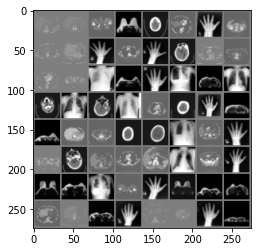

ChestCT ChestCT AbdomenCT BreastMRI HeadCT AbdomenCT Hand  AbdomenCT ChestCT ChestCT Hand  AbdomenCT Hand  HeadCT ChestCT AbdomenCT ChestCT ChestCT CXR   BreastMRI Hand  CXR   BreastMRI CXR   HeadCT CXR   HeadCT CXR   AbdomenCT HeadCT Hand  BreastMRI BreastMRI AbdomenCT AbdomenCT HeadCT HeadCT CXR   AbdomenCT Hand  ChestCT HeadCT AbdomenCT AbdomenCT AbdomenCT CXR   AbdomenCT Hand  BreastMRI BreastMRI CXR   AbdomenCT Hand  BreastMRI BreastMRI BreastMRI AbdomenCT ChestCT BreastMRI Hand  ChestCT ChestCT Hand  BreastMRI


In [20]:
def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

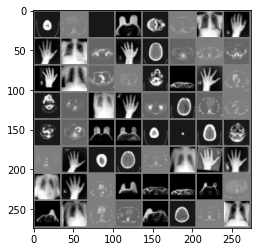

HeadCT ChestCT HeadCT BreastMRI HeadCT ChestCT CXR   Hand  Hand  CXR   AbdomenCT Hand  HeadCT AbdomenCT ChestCT AbdomenCT Hand  CXR   AbdomenCT ChestCT HeadCT BreastMRI Hand  ChestCT HeadCT AbdomenCT CXR   Hand  AbdomenCT HeadCT AbdomenCT ChestCT HeadCT AbdomenCT BreastMRI BreastMRI HeadCT HeadCT HeadCT HeadCT ChestCT Hand  HeadCT HeadCT ChestCT CXR   Hand  Hand  CXR   Hand  ChestCT BreastMRI BreastMRI BreastMRI BreastMRI ChestCT BreastMRI CXR   ChestCT AbdomenCT BreastMRI HeadCT ChestCT CXR  


In [21]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

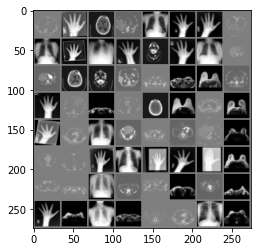

ChestCT Hand  HeadCT AbdomenCT CXR   Hand  Hand  ChestCT CXR   Hand  CXR   Hand  HeadCT Hand  CXR   ChestCT AbdomenCT HeadCT HeadCT AbdomenCT ChestCT BreastMRI BreastMRI AbdomenCT Hand  ChestCT BreastMRI ChestCT HeadCT BreastMRI ChestCT BreastMRI Hand  ChestCT CXR   AbdomenCT ChestCT AbdomenCT ChestCT BreastMRI ChestCT ChestCT Hand  CXR   Hand  Hand  Hand  BreastMRI ChestCT ChestCT CXR   AbdomenCT ChestCT BreastMRI AbdomenCT BreastMRI Hand  BreastMRI CXR   BreastMRI ChestCT ChestCT CXR   BreastMRI


In [22]:
dataiter = iter(val_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

In [40]:
import torch.nn as nn

class SimpleCNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5, padding=0, stride=1),
        nn.ReLU()
    )
  def forward(self, x):
    x = self.conv_layer(x)
    return x
  
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
  )
)


In [41]:
test_x, _ = train_set[0] 
test_x.size()

torch.Size([3, 32, 32])

In [42]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 32, 32])

In [43]:
output = model(test_x)
output.shape

torch.Size([1, 8, 28, 28])

In [44]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

6272


In [54]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU()
    )
    
    self.fc_layers = nn.Sequential(
        nn.Linear(50176, 1024),
        nn.ReLU(),
        nn.Linear(1024, 6)
    )

  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [55]:
model = CNN()
output = model(test_x)
output.shape

torch.Size([1, 6])

In [56]:
torch.cuda.is_available()

False

In [57]:
dev = torch.device('cpu')
print(dev)

cpu


In [60]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [61]:
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        for epoch in range(epochs):
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                for (input, labels) in tqdm(loaders[split],desc=split):
                    input = input.to(dev)
                    labels = labels.to(dev)
                    optimizer.zero_grad()
                    pred = net(input)
                    loss = criterion(pred, labels)
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

In [62]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

In [ ]:
# Train model
train(model, loaders, optimizer, criterion, epochs=10, dev=dev)

train:   0%|          | 0/747 [00:00<?, ?it/s]

In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
  def forward(self, x):
    x = self.conv_layer(x)
    return x
  
model = SimpleCNN()

output = model(test_x)
output.shape

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    
    self.fc_layers = nn.Sequential(
        nn.Linear(89888, 1024),
        nn.ReLU(),
        nn.Linear(1024, 5)
    )

  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
model = CNN()
output = model(test_x)
output.shape

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

train(model, loaders, optimizer, criterion, epochs=10, dev=dev)